In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["xtick.minor.visible"] = True 
plt.rcParams["ytick.minor.visible"] = True 

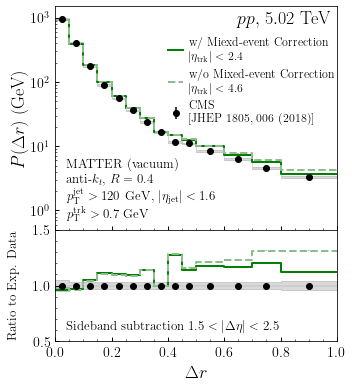

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(5, 5.5), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0,'height_ratios': (5,2.5)})
ax1, ax2  = axs

for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\Delta r$', fontsize=18, labelpad=6)
    ax.set_xticks([0.2,0.4,0.6,0.8, 1.0])
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.label_outer()

ax2.axhline(1, color = "black", linewidth=0.2, alpha=0.5)

ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])
ax1.set_xlim(0,1.0)
ax2.set_xlim(0,1.0)

ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$P(\Delta r)$ (GeV)', fontsize=18, labelpad=2)
ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

ax2.set_ylim(0.5,1.5)

ax1.set_yscale("log")

ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

##########################################################################################################

file1 = '../JetShape2D/5020_PP_New/jetshape_hist_total_JetShape2D_r_jetr0.4_ptj120-300_rapj0.0-1.6_pt0.7-300.0_rap0.0-2.4.txt'
filed = '../exp_data/hepdata_cms_jet_prop_5tev/$P\Deltar$SQRTS_over_NUCLEON_GEV_5020.0_RE_PP-->CHARGEDX_JETALGO_ANTI-K_TJETR=0.4_PTJET_GEV_>120_|ETAJET|_<1.6_PTTRK_GEV_>0.7_|ETATRK|_<2.4_CENTRALITY_pp.txt'

file2 = '/Users/yasukitachibana/GoogleDrive/Codes/AAPaperJetAnalysis/SubStrData/JetShapeCh/5020_PP/jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-4.6.txt'

data1 = np.loadtxt(file1, comments='#')
data2 = np.loadtxt(file2, comments='#')
datad = np.loadtxt(filed, comments='#')


xlen = len(datad[:,0])

x1 = data1[:xlen,0]
y1 = data1[:xlen,3]
y1err = data1[:xlen,4]

x1step = np.append(data1[:xlen,1],data1[xlen-1,2])
y1step = np.append(data1[:xlen,3],data1[xlen-1,3])


x2 = data2[:xlen,1]
y2 = data2[:xlen,3]
y2err = data2[:xlen,4]

x2step = np.append(data2[:xlen,0],data2[xlen-1,2])
y2step = np.append(data2[:xlen,3],data2[xlen-1,3])

# x2 = data2[:,1]
# y2 = data2[:,3]
# y2err = data2[:,4]
# x2step = np.append(data2[:,0],data2[-1,2])
# y2step = np.append(data2[:,3],data2[-1,3])



xd = datad[:,0]
yd = datad[:,3]
yderr = datad[:,4]
xdstep = np.append(datad[:,1],datad[-1,2])
ydstep = np.append(datad[:,3],datad[-1,3])


ydsysp = np.append(datad[:,6],datad[-1,6])
ydsysm = np.append(datad[:,7],datad[-1,7])



ax1.step(x1step, y1step, where='post', label='w/ Miexd-event Correction\n'+r'$|\eta_{\mathrm{trk}}|<2.4$', color='green',linestyle='solid', linewidth = 2)
ax1.errorbar(x1, y1, yerr=y1err, marker="", linestyle="none", color='green')

ax1.step(x2step, y2step, where='post', label='w/o Mixed-event Correction\n'+r'$|\eta_{\mathrm{trk}}|<4.6$', color='darkseagreen',linestyle='dashed', linewidth = 2)
ax1.errorbar(x2, y2, yerr=y1err, marker="", linestyle="none", color='darkseagreen')



ax1.errorbar(xd, yd, yerr=yderr, marker="o", linestyle="none", color = 'black',label='CMS\n [JHEP 1805, 006 (2018)]')
ax1.fill_between(xdstep, ydstep+ydsysm, ydstep+ydsysp, step='post', color='k', alpha=0.15)
#######
ax2.step(x1step, y1step/ydstep, where='post', color='green',linestyle='solid', linewidth = 2)
ax2.errorbar(x1, y1/yd, yerr=y1err/yd, marker="", linestyle="none", color='green')

ax2.step(x2step, y2step/ydstep, where='post', color='darkseagreen',linestyle='dashed', linewidth = 2)
ax2.errorbar(x2, y2/yd, yerr=y2err/yd, marker="", linestyle="none", color='darkseagreen')




ax2.errorbar(xd, yd/yd, yerr=yderr/yd, marker="o", linestyle="none", color = 'black')
ax2.fill_between(xdstep, (ydstep+ydsysm)/ydstep, (ydstep+ydsysp)/ydstep, step='post', color='k', alpha=0.15)
##########################################################################################################
    

ax1.text(0.04, 0.8, r'MATTER (vacuum)'+'\n'+r'anti-$k_t$, $R=0.4$'+'\n'+r'$p_{\mathrm{T}}^{\mathrm{jet}}>120$ GeV, $|\eta_{\mathrm {jet}}|<1.6$'+'\n'+r'$p_{\mathrm{T}}^{\mathrm{trk}}>0.7$ GeV', fontsize = 13, ha = 'left')
ax2.text(0.04, 0.6, 'Sideband subtraction $1.5<|\Delta \eta| <2.5$', fontsize = 13, ha = 'left')



ax1.legend(bbox_to_anchor=(1.05, 0.94), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
# ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
# ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')

plt.tight_layout()
plt.savefig("mixed_event_jetshape_pp.pdf")